In [ ]:
import os
from PIL import Image
import cv2
import pandas as pd
import csv
import numpy as np
import tarfile
from glob import glob

import src

COMPOSITIONAL_NET_PATH = src.config.directories['CompositionalNets']
DATA_PATH = src.config.directories['data']
IMAGES_PATH = os.path.join(DATA_PATH, 'images')

In [3]:
data_entry_filepath = os.path.join(DATA_PATH, 'Data_Entry_2017_v2020.csv')
data_entry = pd.read_csv(data_entry_filepath)
bbox_entries = pd.read_csv(os.path.join(DATA_PATH, 'BBox_List_2017.csv'))
data_entries = pd.read_csv(os.path.join(DATA_PATH, 'Data_Entry_2017_v2020.csv'))

NameError: name 'DATA_PATH' is not defined

In [2]:
bbox_entries[bbox_entries["Finding Label"]== "Mass"].count()

NameError: name 'bbox_entries' is not defined

In [30]:
bbox_entries["Finding Label"].value_counts()

Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64

In [36]:
import pdb
def open_images_by_label(data_path, data_entry, finding_labels=[]):
    image_dict = dict()
    elements = {label: data_entries[data_entries["Finding Labels"] == label]["Image Index"].values for label in finding_labels}
    for fp in glob(os.path.join(DATA_PATH, 'images_*.tar.gz')):
        tar = tarfile.open(fp, 'r:gz')
        for label in finding_labels:
            image_dict[label] = open_images_from_tar(tar, do_filter=True, filter_list=elements[label])
            
    return image_dict
            

def open_images_from_tar(tar, do_filter=False, filter_list=[]):
    images_and_names = []
    if do_filter:
        for member in tar.getmembers():
            if os.path.basename(member.name) in filter_list:
                f = tar.extractfile(member)
                im = Image.open(f)
                images_and_names.append((im, os.path.basename(member.name)))
    else:
        for member in tar.getmembers():
            f = tar.extractfile(member)
            im = Image.open(f)
            images.append(im)
            images_and_names.append((im, os.path.basename(member.name)))
            
    return images_and_names

In [37]:
images_and_names = open_images_by_label(DATA_PATH, data_entry, ["No Finding", "Mass"])

In [40]:
mass_names_bbox = bbox_entries[bbox_entries["Finding Label"] == "Mass"]["Image Index"].values

In [41]:
matches = []
for name in mass_names_bbox:
    for el in data_entries["Image Index"].values:
        if el == name:
            matches.append(name)
            print(f'Found match: {name}. ')

Found match: 00023075_033.png. 
Found match: 00029579_005.png. 
Found match: 00013659_019.png. 
Found match: 00010815_006.png. 
Found match: 00026695_000.png. 
Found match: 00010125_004.png. 
Found match: 00026261_001.png. 
Found match: 00010277_000.png. 
Found match: 00002106_000.png. 
Found match: 00019313_000.png. 
Found match: 00018623_001.png. 
Found match: 00020124_003.png. 
Found match: 00026196_001.png. 
Found match: 00028698_001.png. 
Found match: 00016184_040.png. 
Found match: 00017214_015.png. 
Found match: 00020065_008.png. 
Found match: 00011925_072.png. 
Found match: 00021201_010.png. 
Found match: 00013911_021.png. 
Found match: 00021179_011.png. 
Found match: 00006821_002.png. 
Found match: 00011151_004.png. 
Found match: 00027833_022.png. 
Found match: 00012376_010.png. 
Found match: 00020274_007.png. 
Found match: 00028265_007.png. 
Found match: 00028027_000.png. 
Found match: 00018762_001.png. 
Found match: 00018366_010.png. 
Found match: 00022837_005.png. 
Found ma

In [42]:
data_entries.loc[data_entries['Image Index'].isin(matches)][data_entries["Finding Labels"] == 'Mass'].count()

/home/mattlk/.virtualenvs/CompNet/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Image Index                    17
Finding Labels                 17
Follow-up #                    17
Patient ID                     17
Patient Age                    17
Patient Gender                 17
View Position                  17
OriginalImage[Width            17
Height]                        17
OriginalImagePixelSpacing[x    17
y]                             17
dtype: int64

In [36]:
for k, image_name_tuple in images_and_names.items():
    path = os.path.join(IMAGES_PATH, k)
    for image, name in zip(image_name_tuple[0], image_name_tuple[1]):
        image.save(os.path.join(path, name))

In [22]:
images_by_label = open_images_by_label(DATA_PATH, data_entry, ["No Finding", "Mass"])

In [32]:
# Need to keep tar files open, otherwise we can't access the images later
tar_no_finding = tarfile.open(os.path.join(DATA_PATH, "No Finding.tar.gz"), "r:gz")
images_no_finding, names_no_finding = [], []
for member in tar_no_finding.getmembers():
    images_no_finding.append(Image.open(tar_no_finding.extractfile(member)))
    names_no_finding.append(os.path.basename(member.name))
    
tar_mass = tarfile.open(os.path.join(DATA_PATH, "Mass.tar.gz"), "r:gz")
images_mass, names_mass = [], []
for member in tar_mass.getmembers():
    images_mass.append(Image.open(tar_mass.extractfile(member)))
    names_mass.append(os.path.basename(member.name))

In [13]:
def draw_bbox(img, img_name, bbox_entries, show=False, save=False, save_dir=None):
    x, y, w, h = bbox_entries[bbox_entries["Image Index"] == img_name][["Bbox [x", "y", "w", "h]"]].values
    img_bbox = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    if show:
        cv2.imshow(img_bbox)
    if save or save_dir is not None:
        base = os.path.splitext(os.path.basename(img_name))[0]
        cv2.imwrite(f'{base}_bbox.png')
    return img_bbox

In [15]:
idx = 0
draw_bbox(images_mass[idx], names_mass[idx], bbox_entries, show=True)

ValueError: not enough values to unpack (expected 4, got 0)

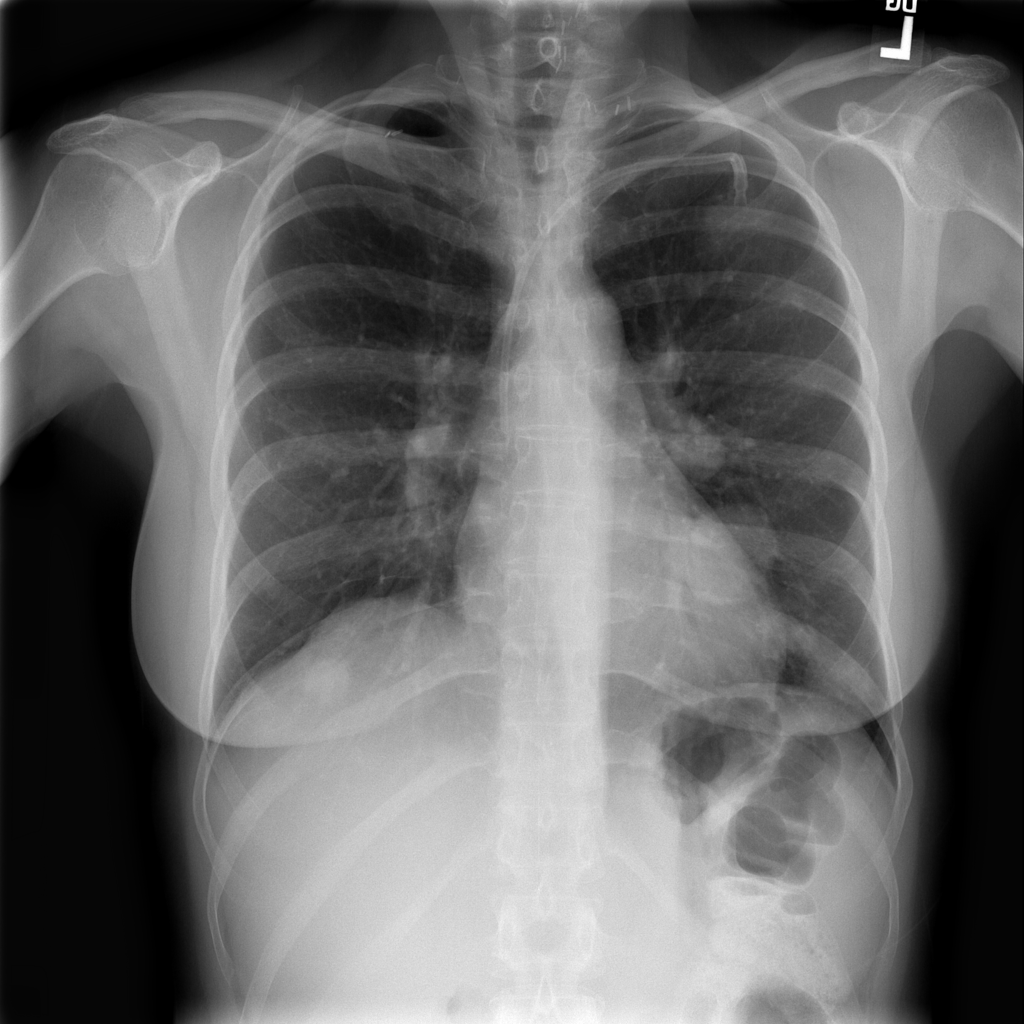

In [43]:
images_mass[1]

In [28]:
bbox_entries[bbox_entries["Image Index"] == names_mass[22]]

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8


In [ ]:
healthy_images
for fp in glob(os.path.join(DATA_PATH, 'images_01.tar.gz')):
    tar = tarfile.open(fp, 'r:gz')
    open_images_from_tar(tar)

In [9]:
all_images = []
for fp in glob(os.path.join(DATA_PATH, 'images_01.tar.gz')):
# for fp in glob(os.path.join(DATA_PATH, 'images_*.tar.gz')):
    tar = tarfile.open(fp, 'r:gz')
    for member in tar.getmembers()[0:1]:
        f = tar.extractfile(member)
        im = Image.open(f)
        all_images.append(im)

In [13]:
member.name

'images/00003307_001.png'

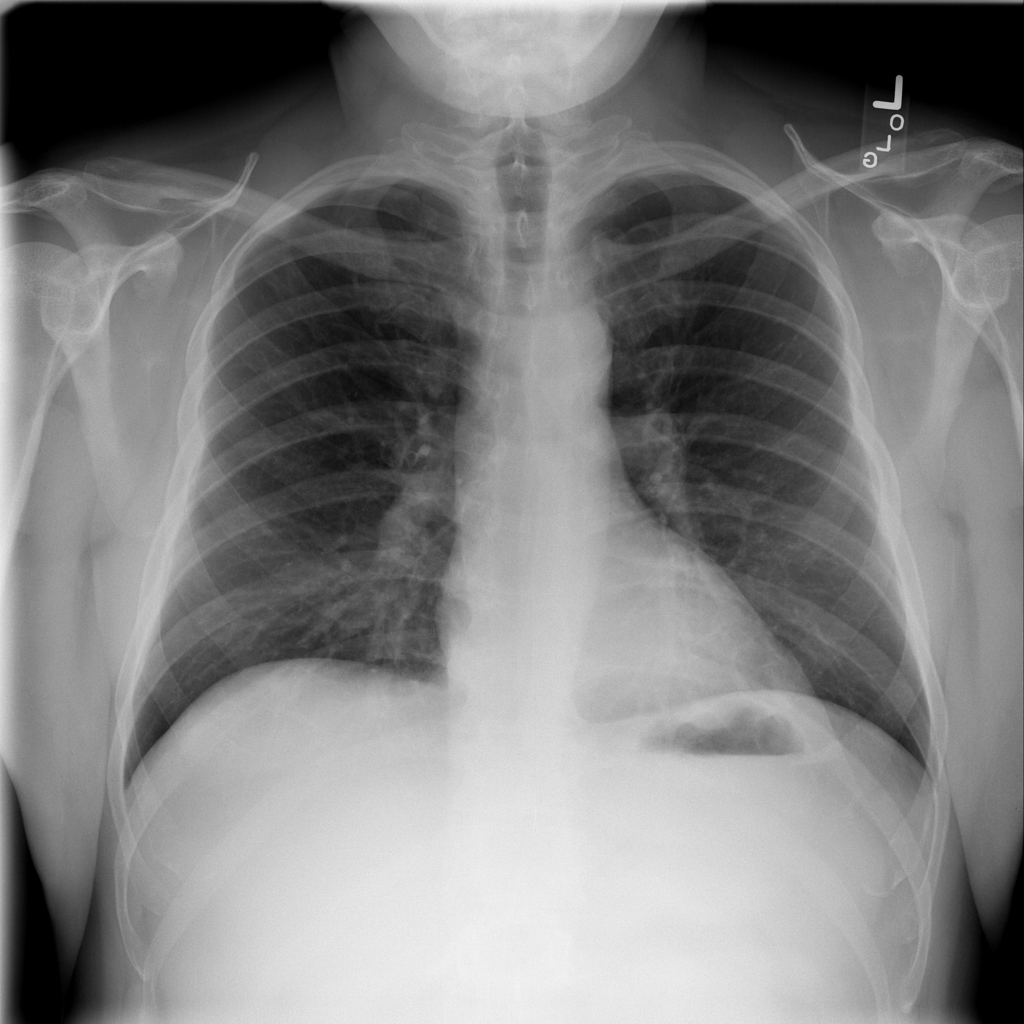

In [63]:
el = tar.getmembers()[0]


In [40]:
images_available = sorted(os.listdir(IMAGES_PATH))

In [41]:
elements = extract_elements(data_entry, key="Mass")
images = [Image.open(os.path.join(IMAGES_PATH, index)) for index in elements["Image Index"] if index in images_available]